In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

In [2]:
%run DMD_functions.ipynb 

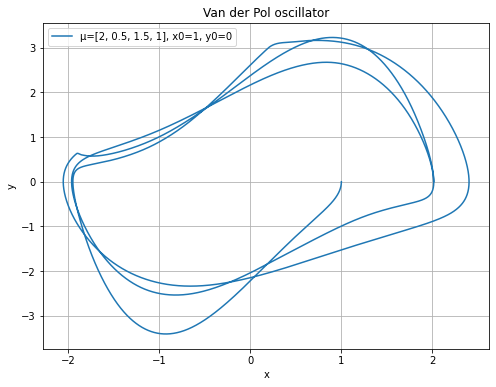

In [4]:
#Van der Pol oscillator system
initial_condition = (1,0)
mu = [2, 0.5, 1.5, 1]
t_span=(0,20-1e-5)
t_eval = np.linspace(t_span[0], t_span[1]-1e-5, 2000000)


def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    mu_u = mu[int(t//5)]
    dydt = mu_u * (1 - x**2) * y - x
    return [dxdt, dydt]

"""solution= solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu[0],), t_eval=t_eval[500000*i:500000*(i+1)], vectorized=True)
solution=solution.y
for i in range(1, 4):
    sol=solve_ivp(van_der_pol, t_span, [solution[0,-1], solution[1,-1]], args=(mu[i],), t_eval=t_eval[500000*i:500000*(i+1)], vectorized=True)
    solution=np.concatenate((solution, sol.y), axis=1)"""
sol = solve_ivp(van_der_pol, t_span, [initial_condition[0], initial_condition[1]], args=(mu,), t_eval=t_eval, vectorized=True) #u sol.y[0] i sol.y[1] su (x,y) koordinate točke za svaki trenutak

#print(sol.y[0].shape, sol.y[1].shape)
#print(sol.t.shape)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()



(2, 2000)


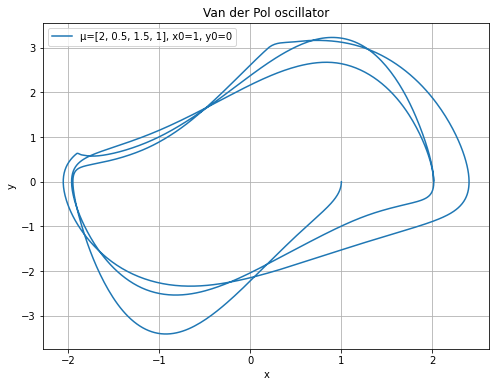

In [5]:
t_used=np.arange(0,2000000,1000)
del (t_eval)
vdp = sol.y[:,t_used]
print(vdp.shape)

plt.figure(figsize=(8, 6))
plt.plot(vdp[0,:], vdp[1,:], label=f"μ={mu}, x0={initial_condition[0]}, y0={initial_condition[1]}")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

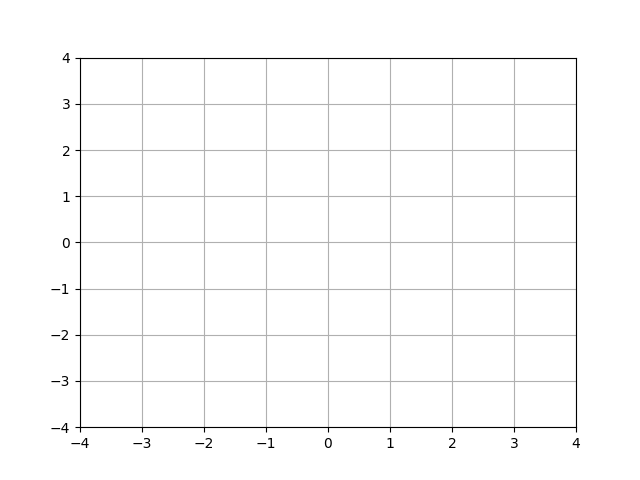

In [6]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,0], vdp[1,0], lw=2)[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,:frame]
    y = vdp[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=vdp.shape[1], interval=50, blit=True, repeat=False)
plt.show()

In [53]:
%matplotlib inline

Ako ih ne "stackam" uvijek ću dobiti max dva moda (nakon svd-a,...)

In [7]:

num_stack = 60
m=vdp.shape[1]
vdp_end=vdp[:,-num_stack:]
vdp = vdp[:,:(m-num_stack+1)]

for i in range(1,num_stack):
    added=np.concatenate((vdp[:2,i:], vdp[:2,:i]), axis=1)
    vdp=np.vstack((vdp,added))

In [8]:
#provjera jel dobro formirana matrica..

k=np.random.randint(num_stack, m-num_stack)
for i in range(1,num_stack):
    if(np.all(vdp[:2,k]==vdp[2*i:2*i+2,k-i])):
        print(True, end=" ")
    else:
        print(False, vdp[:2,k],vdp[2*i:2*i+2,k-i])

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

In [11]:
m=vdp.shape[1]-1

Z, L = DMD(vdp[:,:m], vdp[:,1:(m+1)], tol=1e-6)
print(L.shape)

(100,)


In [12]:
Z, L, r, _, _ = GEDMDQ(vdp[:,:m+1], tol=1e-6)
print(L.shape)

(94,)


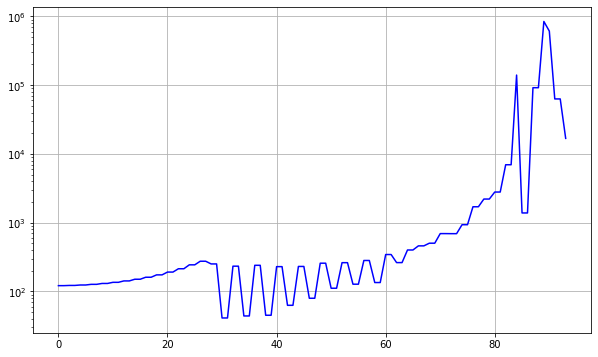

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [15]:
threshold = 1e-3
indices = np.where(r<threshold)[0]
print(indices, indices.shape)

[76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93] (18,)


In [ ]:
times = [i for i in range(m-100,m+100)]

reconstructed = DMD_reconstruction(vdp[:,:1], Z, indices, L, times)


**uzimamo dio oscilatora - iz toga procjena za dalje**


.

In [17]:
poc=450; zav=550; rec=50

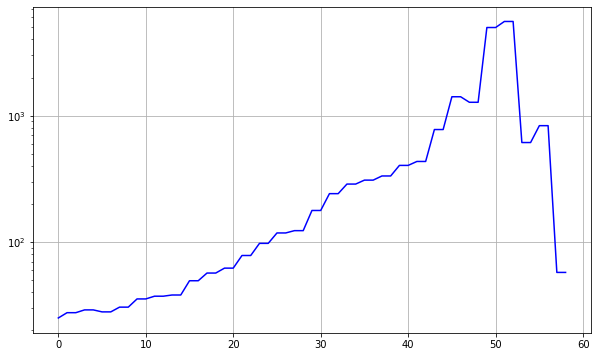

In [18]:
Z, L, r, _, _ = GEDMDQ(vdp[:,poc:zav], tol=1e-6)

plt.figure(figsize=(10, 6))
plt.plot(1/r, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [19]:
threshold=1e-3
indices=np.where(r<threshold)[0]
indices.shape

###threshold se mijenja ovisno o tome koliko ih stackam!! 

(8,)

In [20]:
reconstructed = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, [i for i in range(zav-poc+rec)])

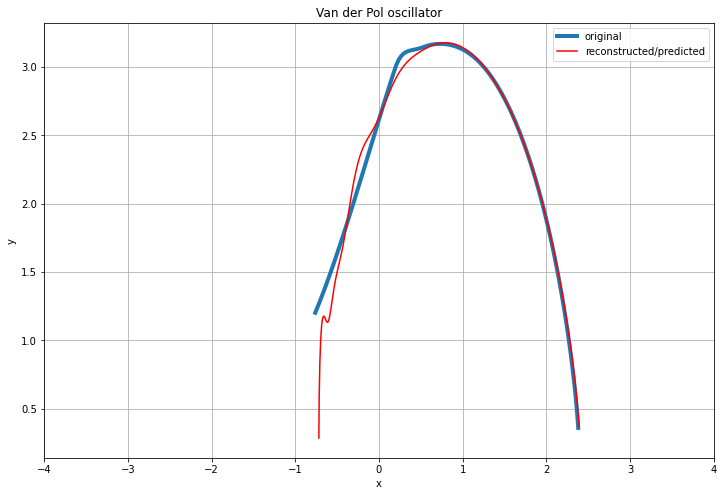

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(vdp[0,poc:zav+rec], vdp[1,poc:zav+rec],lw=4, label=f"original")
plt.plot(reconstructed[0,:], reconstructed[1,:], label=f"reconstructed/predicted", color="red")

    
plt.title("Van der Pol oscillator")
plt.xlabel("x")
plt.xlim((-4,4))
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

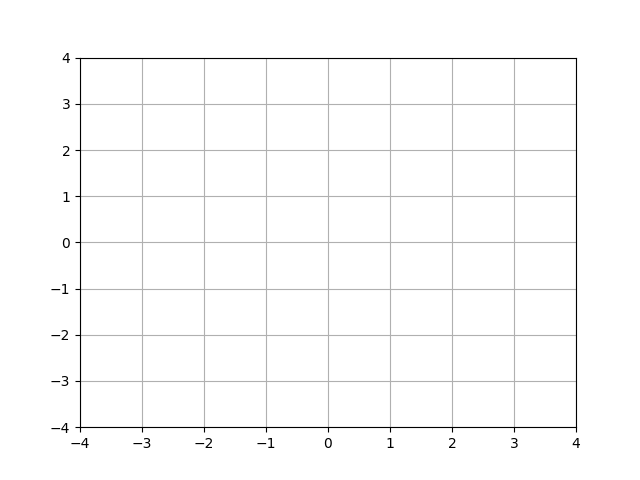

In [22]:
%matplotlib widget

fig, ax = plt.subplots()

line2 = ax.plot(vdp[0,poc], vdp[1,poc], lw=4, color="blue")[0]
line1 = ax.plot(reconstructed[0,0], reconstructed[1,0], lw=2, color="red")[0]
ax.set_xbound(-4,4); ax.set_ybound(-4,4)
plt.grid()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = vdp[0,poc:(poc+frame)]
    y = vdp[1,poc:(poc+frame)]
    x_r = reconstructed[0,:frame]
    y_r = reconstructed[1,:frame]
    # update the line plot:
    line2.set_xdata(x)
    line2.set_ydata(y)
    line1.set_xdata(x_r)
    line1.set_ydata(y_r)
    return (line2, line1)


ani = animation.FuncAnimation(fig=fig, func=update, frames=zav-poc+rec, interval=150, blit=True, repeat=False)
plt.show()

**adding and removing snapshots**


...

In [23]:
%matplotlib inline

(16,)
(64,)
(56,)
(46,)
(40,)
(61,)
(53,)
(44,)
(55,)
(47,)
(38,)
(36,)
(34,)
(32,)
(30,)
(32,)
(32,)
(32,)
(28,)
(28,)
(38,)
(52,)
(42,)
(40,)
(40,)
(34,)
(32,)
(20,)
(22,)
(20,)
(20,)
(20,)
(20,)
(20,)
(24,)
(24,)
(24,)
(26,)
(48,)


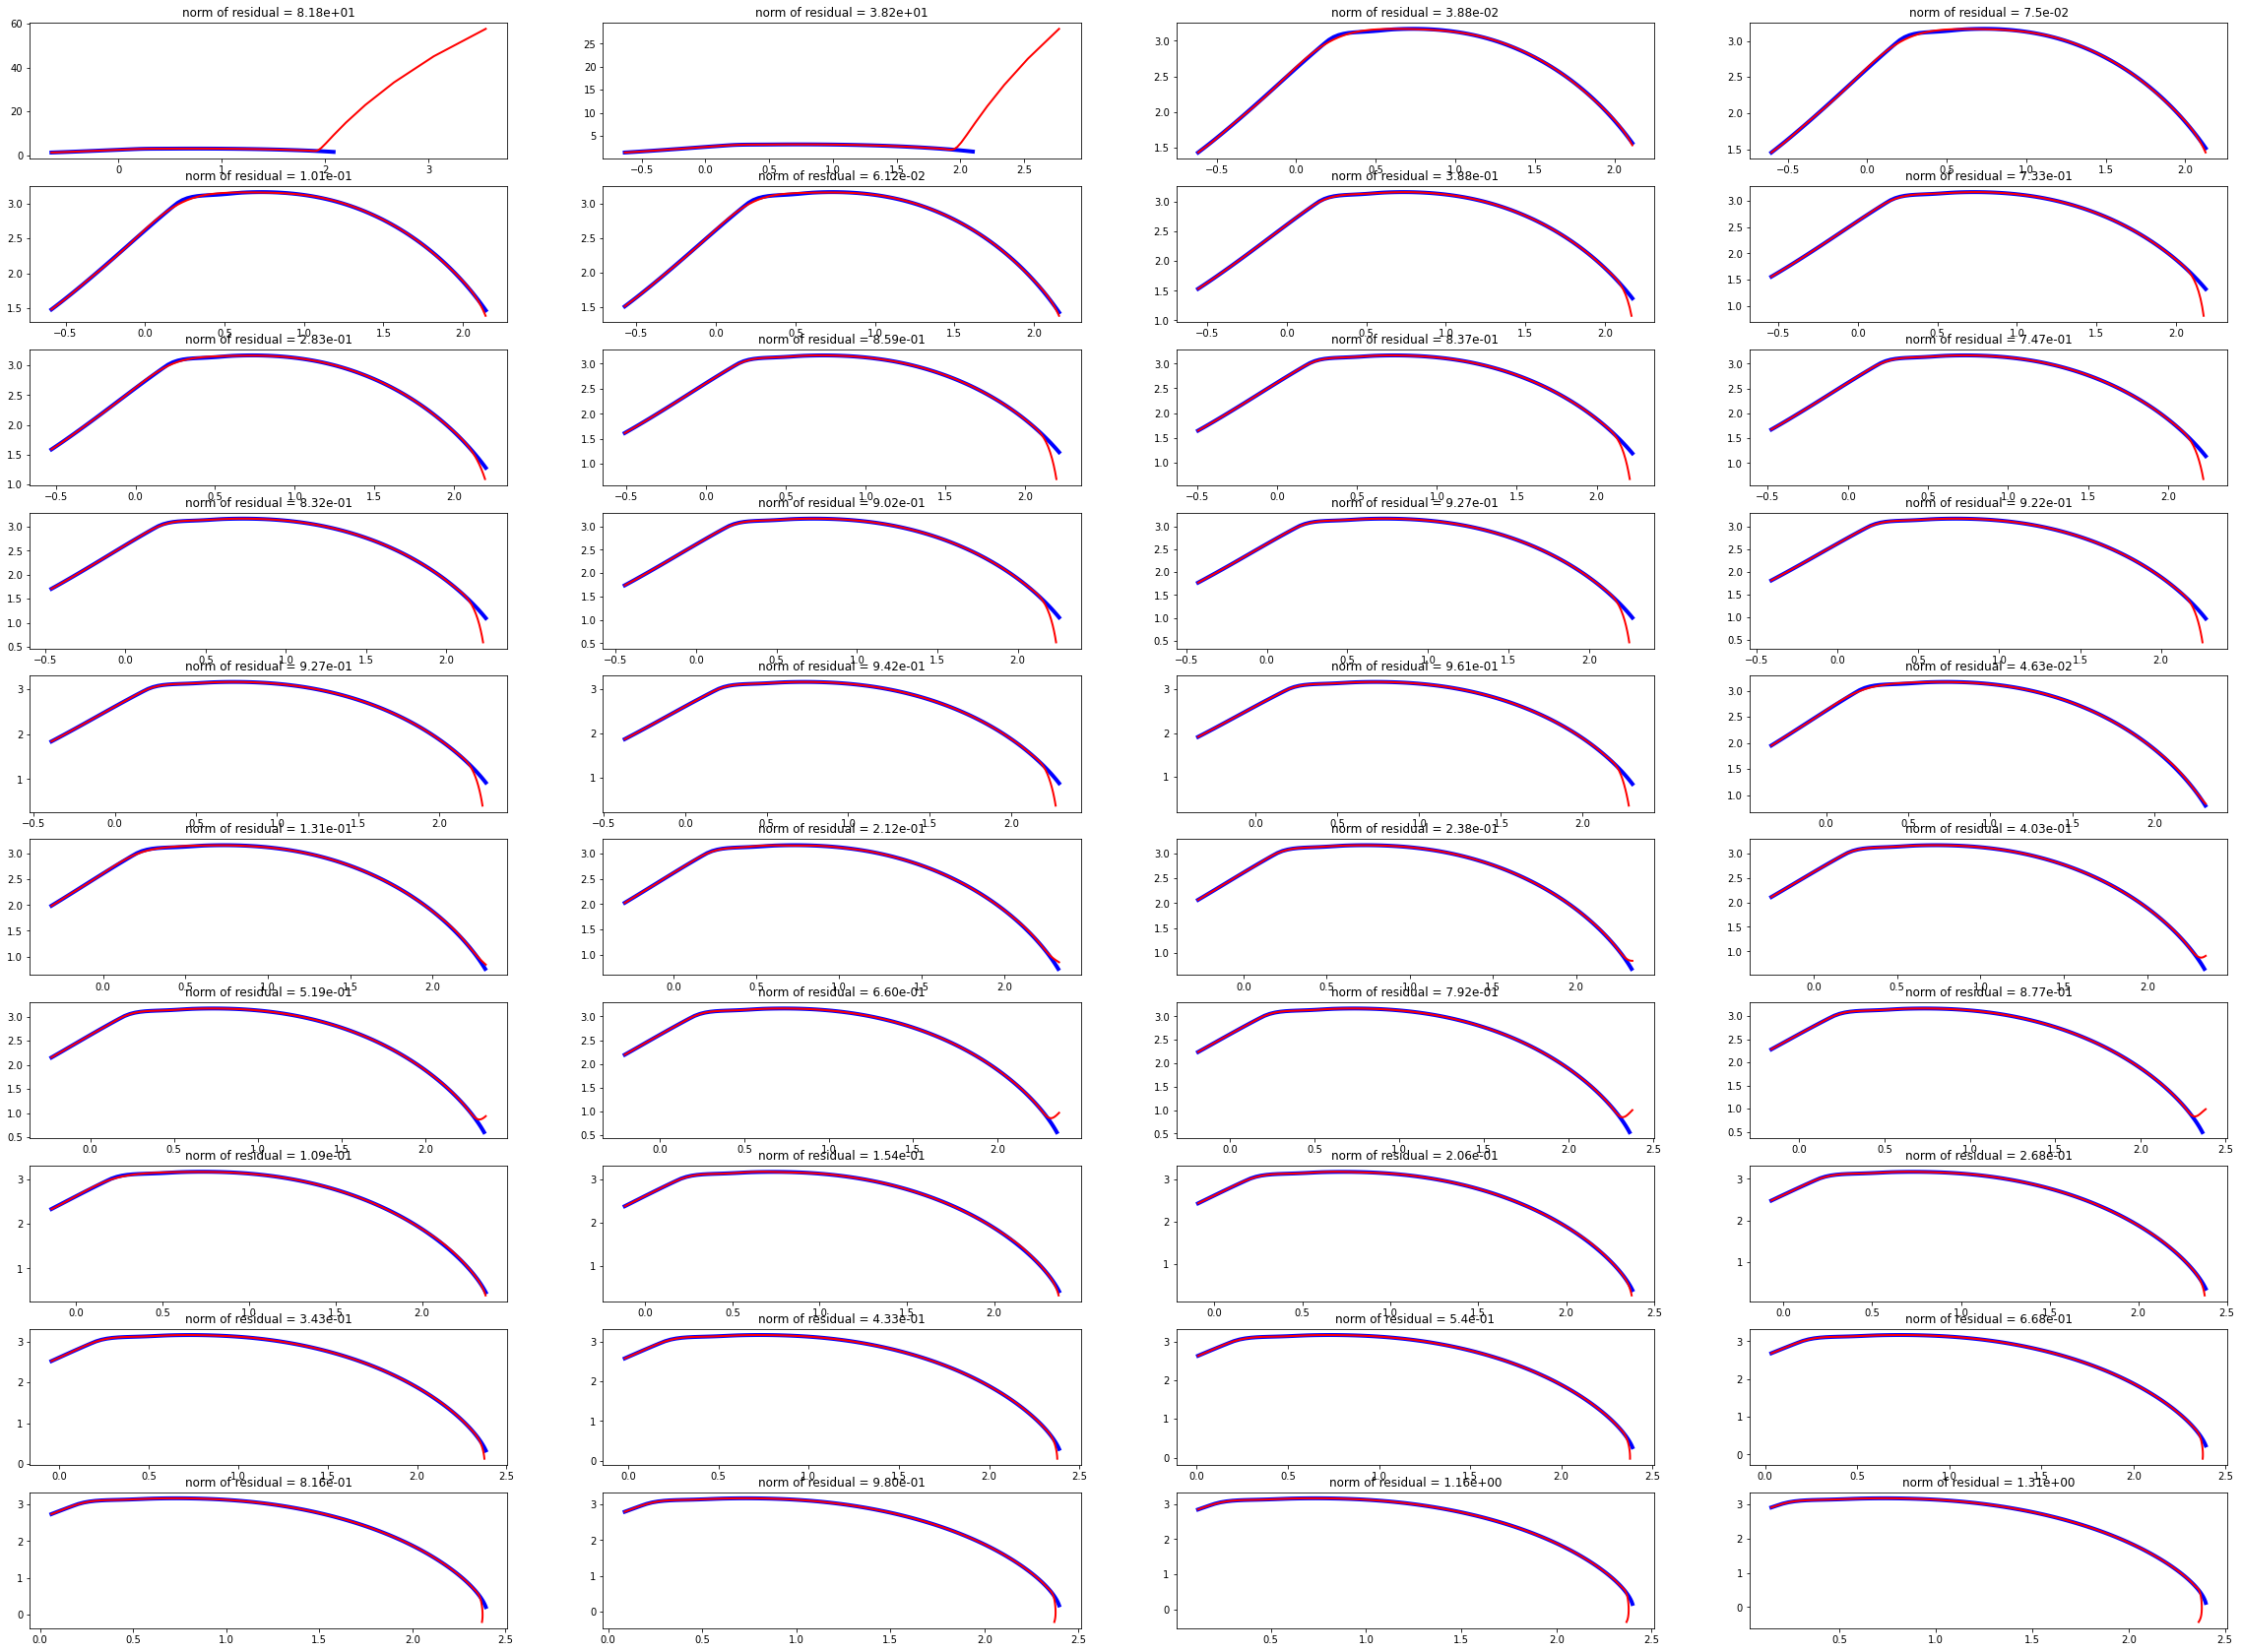

In [40]:
####################################################################################################################################
#           BEZ WEIGHTS
####################################################################################################################################


#dodajem 1
koliko_predvidam=10

poc=400; zav=500 #u 500. se mijenja mu


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav], tol=1e-6)  ######################## Bilo je potrebno smanjiti tolerance (za odredivanje numerickog ranga) - sad vise nema ni linalg error u solve:)

threshold=1e-2
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, tol=1e-6)
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, tol=1e-6)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k
    # ovo jako lose radi... zasto...
        """if res > 1/50:
            poc=zav-50
            threshold = 1e-1"""





In [23]:
"""##nema razlike ako dodajem weights u dmd dio

#dodajem 1
koliko_predvidam=10

poc=500; zav=600

p=0.9
#weights = np.concatenate((np.array([p**i for i in range(zav-poc+koliko_predvidam-14,0,-1)]), np.ones(10)))
weights = np.concatenate((np.array([p**i for i in range(zav-poc-11,0,-1)]), np.ones(10)))
#weights = np.array([p**i for i in range(zav-poc-1,-1,-1)]).reshape(-1,1)
#weights = np.ones(zav-poc).reshape(-1,1)


koliko_x=10; koliko_y=4
fig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)

Z, L, r, Q, R = GEDMDQ(vdp[:,poc:zav],weights=weights)

threshold=1
indices = np.where(r < threshold)[0]
times=[i for i in range(zav-poc+koliko_predvidam)]
predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)

axs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili prvi par??
axs[0,0].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
axs[0,0].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))


br=0
for i in range(koliko_x):
    for j in range(koliko_y):
        if(i==0 and j==0):
            continue
        poc=poc+1; zav=zav+1
        _,_,_,Q,R,_ = DMD_discarding_snap(1, Q, R, weights=weights[1:])
        
        Z, L, r, Q, R = DMD_added_snap(vdp[:,(zav-1):zav], Q, R, weights=weights)

        indices=np.where(r < threshold)[0]
        print(indices.shape)


        predicted = DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)
        
        axs[i,j].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4)
        axs[i,j].plot(predicted[-2,:], predicted[-1,:], color="red", lw=2)
        res=np.linalg.norm(predicted[-2:,-koliko_predvidam:]-vdp[-2:,zav:zav+koliko_predvidam])
        axs[i,j].set_title("norm of residual = {}".format(np.format_float_scientific(res, precision=2)))
        threshold=1/50
    #ako norma res < 1e-1 npr. odsječi sve osim zadnjih k



###linalg warning - prije dodavanja - mozda provjeriti je li vec sadrzan... procjeriti u fji za Q.T @ B je li nesto "skoro" nula?...

"""

'##nema razlike ako dodajem weights u dmd dio\n\n#dodajem 1\nkoliko_predvidam=10\n\npoc=500; zav=600\n\np=0.9\n#weights = np.concatenate((np.array([p**i for i in range(zav-poc+koliko_predvidam-14,0,-1)]), np.ones(10)))\nweights = np.concatenate((np.array([p**i for i in range(zav-poc-11,0,-1)]), np.ones(10)))\n#weights = np.array([p**i for i in range(zav-poc-1,-1,-1)]).reshape(-1,1)\n#weights = np.ones(zav-poc).reshape(-1,1)\n\n\nkoliko_x=10; koliko_y=4\nfig, axs = plt.subplots(koliko_x, koliko_y, figsize=(40,30), squeeze=True)\n\nZ, L, r, Q, R = GEDMDQ(vdp[:,poc:zav],weights=weights)\n\nthreshold=1\nindices = np.where(r < threshold)[0]\ntimes=[i for i in range(zav-poc+koliko_predvidam)]\npredicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times)\n#predicted=DMD_reconstruction(vdp[:,poc:(zav-1)], Z, indices, L, times, weights=weights)\n\naxs[0,0].plot(vdp[-2, poc:zav+koliko_predvidam], vdp[-1,poc:zav+koliko_predvidam], color="blue", lw=4) ###koji predvidam? zadnji par ili pr